# 0.0 Imports

In [1]:
import numpy              as np
import pandas             as pd
import seaborn            as sns
import plotly.express     as px
import matplotlib.pyplot  as plt

import folium
import geopandas

from datetime             import datetime
from streamlit_folium     import folium_static
from folium.plugins       import MarkerCluster
from IPython.core.display import HTML
from IPython.display      import Image

## 0.1 Helper Functions

In [2]:
def personal_settings():
    
    ## plotly settings
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [20, 10]
    plt.rcParams['font.size'] = 8
    
    ## notebook settings
    display(HTML('<style>.container{width:98% !important;}</style>'))
    np.set_printoptions(suppress=True)
    pd.set_option('display.float_format', '{:.2f}'.format)

    ## seaborn settings
    sns.set(rc={'figure.figsize':(22,10)})
    sns.set_theme(style = 'darkgrid', font_scale = 1.2)

In [3]:
personal_settings();

## 0.2 Loading Data

In [4]:
df_raw = pd.read_csv('datasets/kc_house_data.csv')

# 1.0 Data Description

In [5]:
df1 = df_raw.copy()
df1.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.00,3,1.00,1180,5650,1.00,0,0,...,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
1,6414100192,20141209T000000,538000.00,3,2.25,2570,7242,2.00,0,0,...,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639
2,5631500400,20150225T000000,180000.00,2,1.00,770,10000,1.00,0,0,...,6,770,0,1933,0,98028,47.74,-122.23,2720,8062
3,2487200875,20141209T000000,604000.00,4,3.00,1960,5000,1.00,0,0,...,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000
4,1954400510,20150218T000000,510000.00,3,2.00,1680,8080,1.00,0,0,...,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503


## 1.1 Rename Columns

In [6]:
print(df1.columns)

df1 = df1.rename(columns={'price': 'buying_price'})

df1.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')


Index(['id', 'date', 'buying_price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

## 1.2 Data Dimensions

In [7]:
print(df1.shape[0], 'rows')
print(df1.shape[1], 'columns')

21613 rows
21 columns


## 1.3 Data Types

In [8]:
description = []
for i in df1.columns:
    description.append([
        i,
        df1[i].dtypes,
        df1[i].nunique(),
        df1[i].drop_duplicates().sample(2).values
    ])

pd.DataFrame(data=description, columns=['attributes','dtypes', 'nunique','sample'])

,attributes,dtypes,nunique,sample
0,id,int64,21436,"[4224100030, 4443800030]"
1,date,object,372,"[20150415T000000, 20140816T000000]"
2,buying_price,float64,4028,"[808100.0, 194250.0]"
3,bedrooms,int64,13,"[6, 33]"
4,bathrooms,float64,30,"[4.25, 2.0]"
5,sqft_living,int64,1038,"[3470, 3290]"
6,sqft_lot,int64,9782,"[6144, 18568]"
7,floors,float64,6,"[2.5, 3.5]"
8,waterfront,int64,2,"[1, 0]"
9,view,int64,5,"[0, 1]"


## 1.4 Check NA

In [9]:
description = []
for i in df1.columns:
    description.append([
        i,
        df1[i].isna().sum(),
        round((df1[i].isna().sum()/len(df1))*100)
    ])

pd.DataFrame(data=description, columns=['attributes','null', '%null'])

,attributes,null,%null
0,id,0,0
1,date,0,0
2,buying_price,0,0
3,bedrooms,0,0
4,bathrooms,0,0
5,sqft_living,0,0
6,sqft_lot,0,0
7,floors,0,0
8,waterfront,0,0
9,view,0,0


## 1.5 Fillout NA

In [10]:
## nothing to fill

## 1.6 Change Data Types

In [11]:
## changing 'date' type from OBJECT to DATE
df1['date'] = pd.to_datetime(df1['date'], format='%Y-%m-%d')

## checking 'date' type
display(df1[['date']].head())
display(df1[['date']].dtypes)

,date
0,2014-10-13
1,2014-12-09
2,2015-02-25
3,2014-12-09
4,2015-02-18


date    datetime64[ns]
dtype: object

## 1.7 Check Duplicates

In [12]:
print(df1.shape[0], 'number of rows')
print(df1['id'].unique().shape[0], 'uniques ids')
print(df1.duplicated('id').sum(), '  duplicate ids')

21613 number of rows
21436 uniques ids
177   duplicate ids


## 1.8 Drop Duplicates

In [13]:
## sorting dataframe by date
df1 = df1.sort_values('date', ascending=True)

## deleting ids that appears first
df1 = df1.drop_duplicates(subset='id', keep='last')

print(df1.shape[0], 'number of rows')
print(df1['id'].unique().shape[0], 'uniques ids')
print(df1.duplicated('id').sum(), '    duplicate ids')

21436 number of rows
21436 uniques ids
0     duplicate ids


## 1.9 Descriptive Statistical

In [14]:
qnt1_attributes = df1[['buying_price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15', 'lat', 'long']]
cat1_attributes = df1[['date', 'yr_built', 'yr_renovated', 'waterfront', 'view', 'condition', 'grade','zipcode']]

### 1.9.1 Quantitative Attributes

In [15]:
## count, mean, std, min, quartile 1 (25%), quartile 2(50%), quartile 3 (75%) and max
qnt1_attributes.describe().T

,count,mean,std,min,25%,50%,75%,max
buying_price,21436.00,541649.96,367314.93,75000.00,324866.00,450000.00,645000.00,7700000.00
bedrooms,21436.00,3.37,0.93,0.00,3.00,3.00,4.00,33.00
bathrooms,21436.00,2.12,0.77,0.00,1.75,2.25,2.50,8.00
sqft_living,21436.00,2082.70,919.15,290.00,1430.00,1920.00,2550.00,13540.00
sqft_lot,21436.00,15135.64,41538.62,520.00,5040.00,7614.00,10696.25,1651359.00
floors,21436.00,1.50,0.54,1.00,1.00,1.50,2.00,3.50
sqft_above,21436.00,1790.96,829.03,290.00,1200.00,1560.00,2220.00,9410.00
sqft_basement,21436.00,291.74,442.78,0.00,0.00,0.00,560.00,4820.00
sqft_living15,21436.00,1988.31,685.70,399.00,1490.00,1840.00,2370.00,6210.00
sqft_lot15,21436.00,12785.96,27375.47,651.00,5100.00,7620.00,10087.25,871200.00


### 1.9.2 Categorical Attributes

The qualitative attributes yr_built, yr_renovated, view, condition, grade and zipcode are ordinal, i.e. they express some sort of ordering.

In [16]:
## min, max, uniques, mode and mode frequency
min_value = pd.DataFrame(cat1_attributes.apply(np.min)).rename(columns = {0: 'min'}).astype(str)
max_value = pd.DataFrame(cat1_attributes.apply(np.max)).rename(columns = {0: 'max'}).astype(str)

cat1_summary = cat1_attributes.astype('category').describe().T.drop(columns = 'count').rename(columns = {'top': 'mode', 'freq': 'mode freq'}).astype(str)
cat1_summary = pd.concat([min_value, max_value, cat1_summary], axis=1)
cat1_summary

,min,max,unique,mode,mode freq
date,2014-05-02 00:00:00,2015-05-27 00:00:00,372,2014-06-23 00:00:00,142
yr_built,1900,2015,116,2014,559
yr_renovated,0,2015,70,0,20526
waterfront,0,1,2,0,21273
view,0,4,5,0,19320
condition,1,5,5,3,13911
grade,1,13,12,7,8896
zipcode,98001,98199,70,98103,600


# 2.0 Data Filtering

In [17]:
df2 = df1.copy()

### 2.1 Check for filtering

Check bedrooms and bathrooms.

In [18]:
display(df2[['bedrooms', 'bathrooms']].describe())

,bedrooms,bathrooms
count,21436.00,21436.00
mean,3.37,2.12
std,0.93,0.77
min,0.00,0.00
25%,3.00,1.75
50%,3.00,2.25
75%,4.00,2.50
max,33.00,8.00


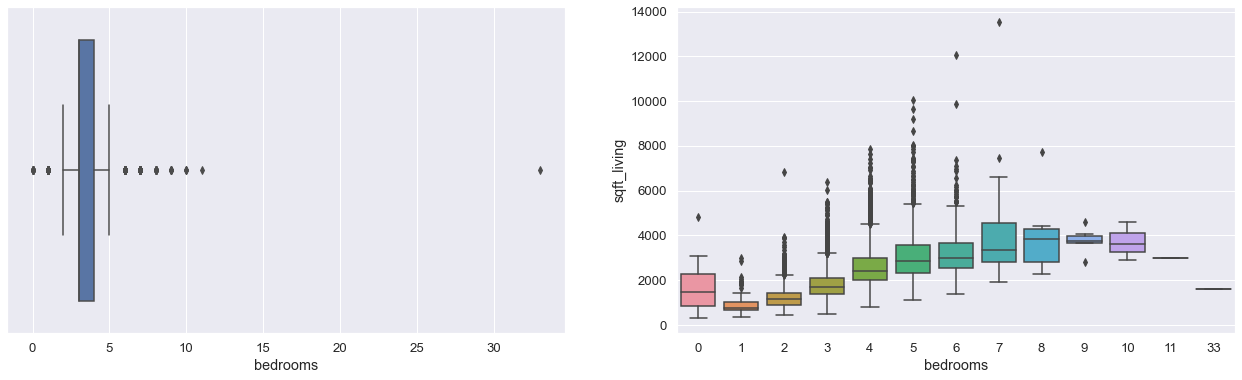

In [19]:
plt.figure(figsize=(22, 6))

plt.subplot(1,2,1)
sns.boxplot(x = 'bedrooms',  data=df2)

plt.subplot(1,2,2)
sns.boxplot(x = 'bedrooms', y='sqft_living', data=df2);

There is just one property with a bedroom equal to 33. The property has a small area to have 33 bedrooms.   
There is only one property with 11 bedrooms. The property has an area of 3000 square feet. Although it is unusual, it is possible for a property of this size to have 11 bedrooms.

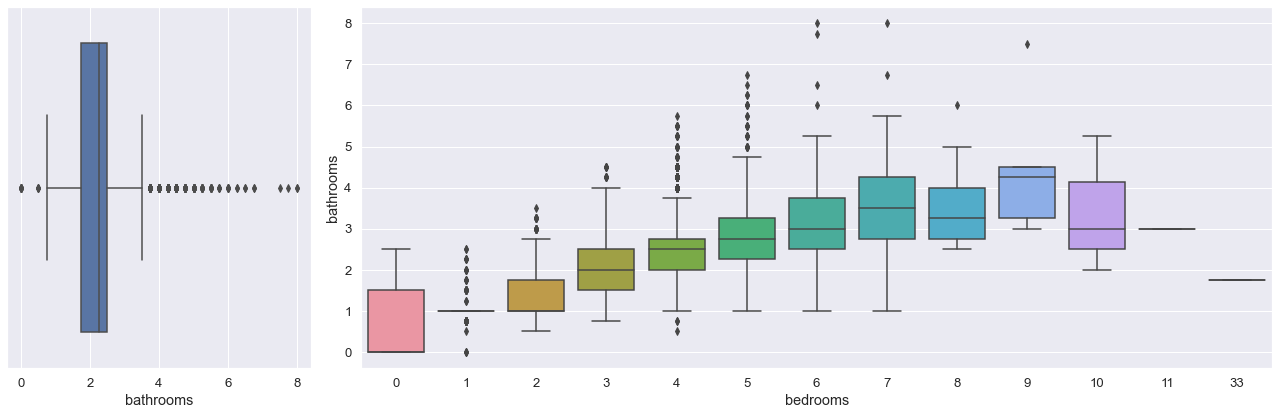

In [20]:
## specify plot layouts with different width using subplots()
fig, axs = plt.subplots(1,2, figsize=(18, 6), gridspec_kw=dict(width_ratios=[1,3]))

sns.boxplot(x = 'bathrooms',  data=df2, ax=axs[0])
sns.boxplot(x = 'bedrooms', y='bathrooms', data=df2, ax=axs[1])

fig.tight_layout()
plt.show()

For bathrooms, 0.5 is a room with a toilet but no shower, 0.75 is a bathroom that has either a shower or tub with sink and toilet, and 1 a bathroom that has shower and tub with sink and toilet (https://www.badeloftusa.com/buying-guides/bathrooms).       
Properties with bathrooms less than 0.75 were considered commercial properties. The house rocket company only works with residential properties.    
There are some properties with zero bedrooms, but bathrooms more than 0.75. These properties were considered residential properties studio-type.

### 2.2 Data Filtering

In [21]:
df2 = df2[(df2['bathrooms'] >= 0.75) & (df2['bedrooms'] != 33)]

## checking the filtering
print(f"Min. number of bathrooms: {df2['bathrooms'].min()}")
print(f"Max. number of bedrooms : {df2['bedrooms'].max()}")

Min. number of bathrooms: 0.75
Max. number of bedrooms : 11


# 3.0 Feature Engineering

In [22]:
df3 = df2.copy()

## 3.1 Mind Map

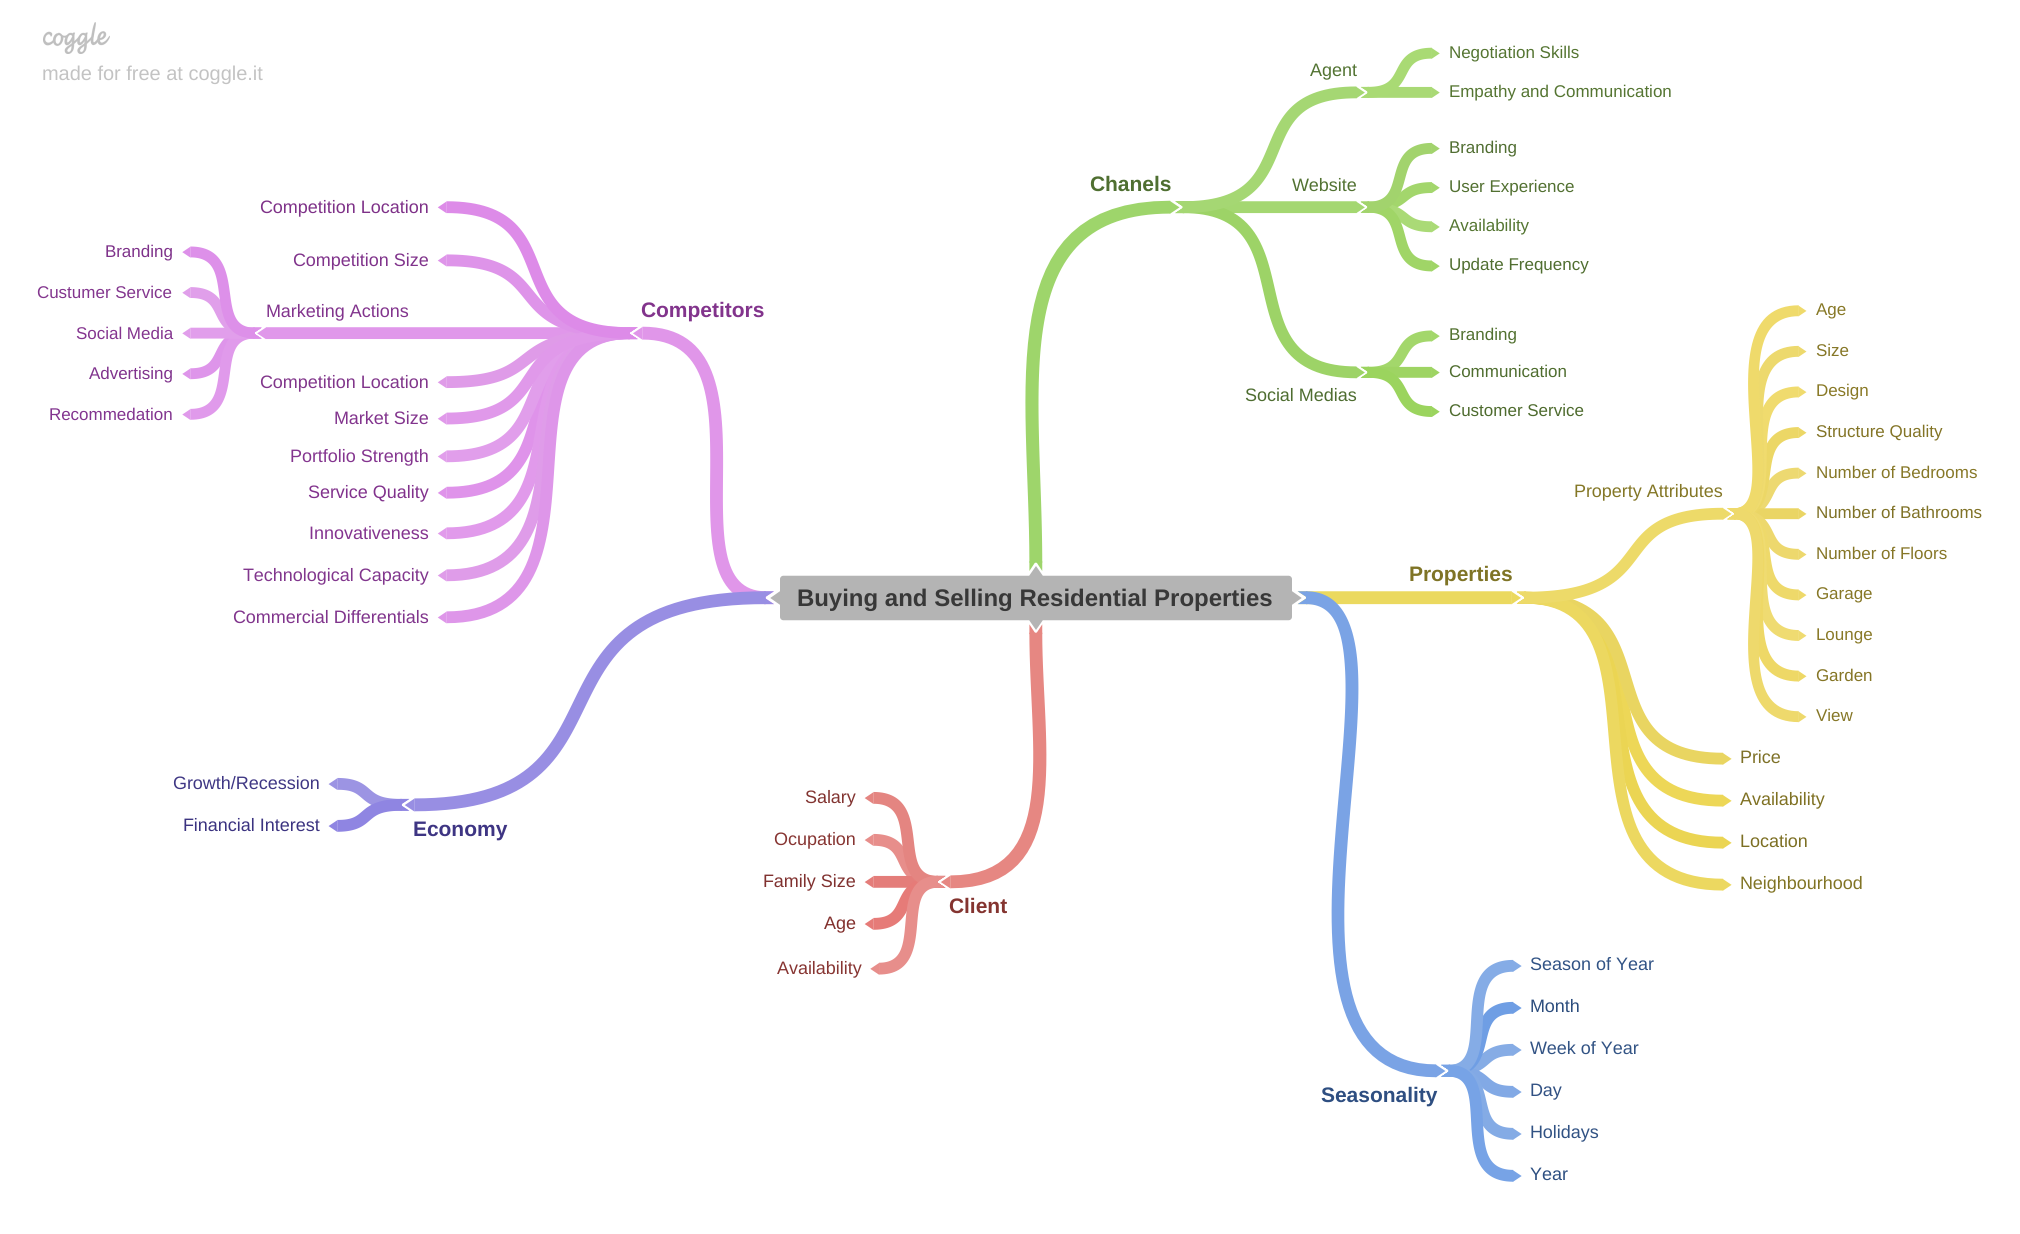

In [23]:
Image('images/mind_map.png')

## 3.2 Hypotesis List

**H1**. At the median, waterfront properties are 50% more expensive than non-waterfront properties.     
**H2**. At the median, properties with good views that are not in good condition are at least 25% more expensive than properties that do not have good view that are in good condition.    
**H3**. On average, older properties are at least 35% cheaper than newer properties.   
**H4**. On averange, with every bedroom, the value of the properties rises 10%.   
**H5**. On average, properties without a basement have a lot area at least 20% bigger and are at least 15% cheaper than those with a basement.   
**H6**. The living space of the properties increased over construction year timeline.   
**H7**. Considering the only complete year in the dataset (2014), more than 40% of properties became available in the summer.    
**H8**. Properties prices vary through seasons of the year and are on average 15% cheaper in winter than in spring.   

## 3.3 Features Creation

Since we have filtered our data, let's describe the price after filtering to create the price_bins feature.

In [24]:
df3['buying_price'].describe()

count     21421.00
mean     541745.83
std      367313.63
min       78000.00
25%      324950.00
50%      450500.00
75%      645000.00
max     7700000.00
Name: buying_price, dtype: float64

The mean value is greater than the median. This is an indication that the variable is positively skewed. To better represent the central tendency, we will use the median as to create the price_bins feature.

In [25]:
## price bins by median
df3['price_bins'] = df3['buying_price'].apply(lambda x: 'under_median' if x < 450500 else'from_median_upward')

## seasons of the year
def get_season(date):
    year = int(date.year)
    seasons = {'spring':(datetime(year,3,21), datetime(year,6,20)),
               'summer':(datetime(year,6,21), datetime(year,9,22)),
               'autumn':(datetime(year,9,23), datetime(year,12,20))}
    
    for season,(season_start, season_end) in seasons.items():
        if date >= season_start and date <= season_end:
            return season
    else:
        return 'winter'

df3['season'] = df3['date'].apply( get_season ).astype(str)

## price per square foot built
df3['price_sqft'] = df3[['buying_price', 'sqft_living']].apply(lambda x: x['buying_price']/x['sqft_living'], axis=1).astype(np.int64)

## if property is newer
df3['newer'] = df3['yr_built'].apply(lambda x: 1 if x >= 1965 else 0).astype(np.int64)

## if property was basement
df3['basement'] = df3['sqft_basement'].apply(lambda x: 1 if x != 0 else 0).astype(np.int64)

## if property was renovated
df3['renovated'] = df3['yr_renovated'].apply(lambda x: 1 if x != 0 else 0).astype(np.int64)

In [26]:
df3[['date', 'season', 'buying_price', 'price_bins','sqft_living', 'price_sqft', 'yr_built', 'newer', 'sqft_basement', 'basement', 'yr_renovated', 'renovated']].sample(5)

,date,season,buying_price,price_bins,sqft_living,price_sqft,yr_built,newer,sqft_basement,basement,yr_renovated,renovated
13217,2015-02-25,winter,455000.00,from_median_upward,1510,301,1983,1,0,0,0,0
16837,2015-01-12,winter,1300000.00,from_median_upward,3110,418,1990,1,1070,1,0,0
20744,2014-09-05,summer,345000.00,under_median,860,401,2009,1,0,0,0,0
17324,2015-01-06,winter,1629000.00,from_median_upward,3090,527,1964,0,0,0,0,0
20643,2015-02-05,winter,640000.00,from_median_upward,3220,198,2013,1,0,0,0,0


# 4.0 Exploratory Data Analysis

In [27]:
df4 = df3.copy()

In [28]:
qnt2_attributes = df4[['buying_price', 'price_sqft', 'bedrooms', 'bathrooms', 'floors', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15', 'lat', 'long']]
cat2_attributes = df4[['price_bins', 'date', 'season', 'zipcode', 'yr_built', 'newer', 'renovated', 'yr_renovated', 'basement', 'waterfront', 'view', 'condition', 'grade']]

## 4.1 Univariate Analysis

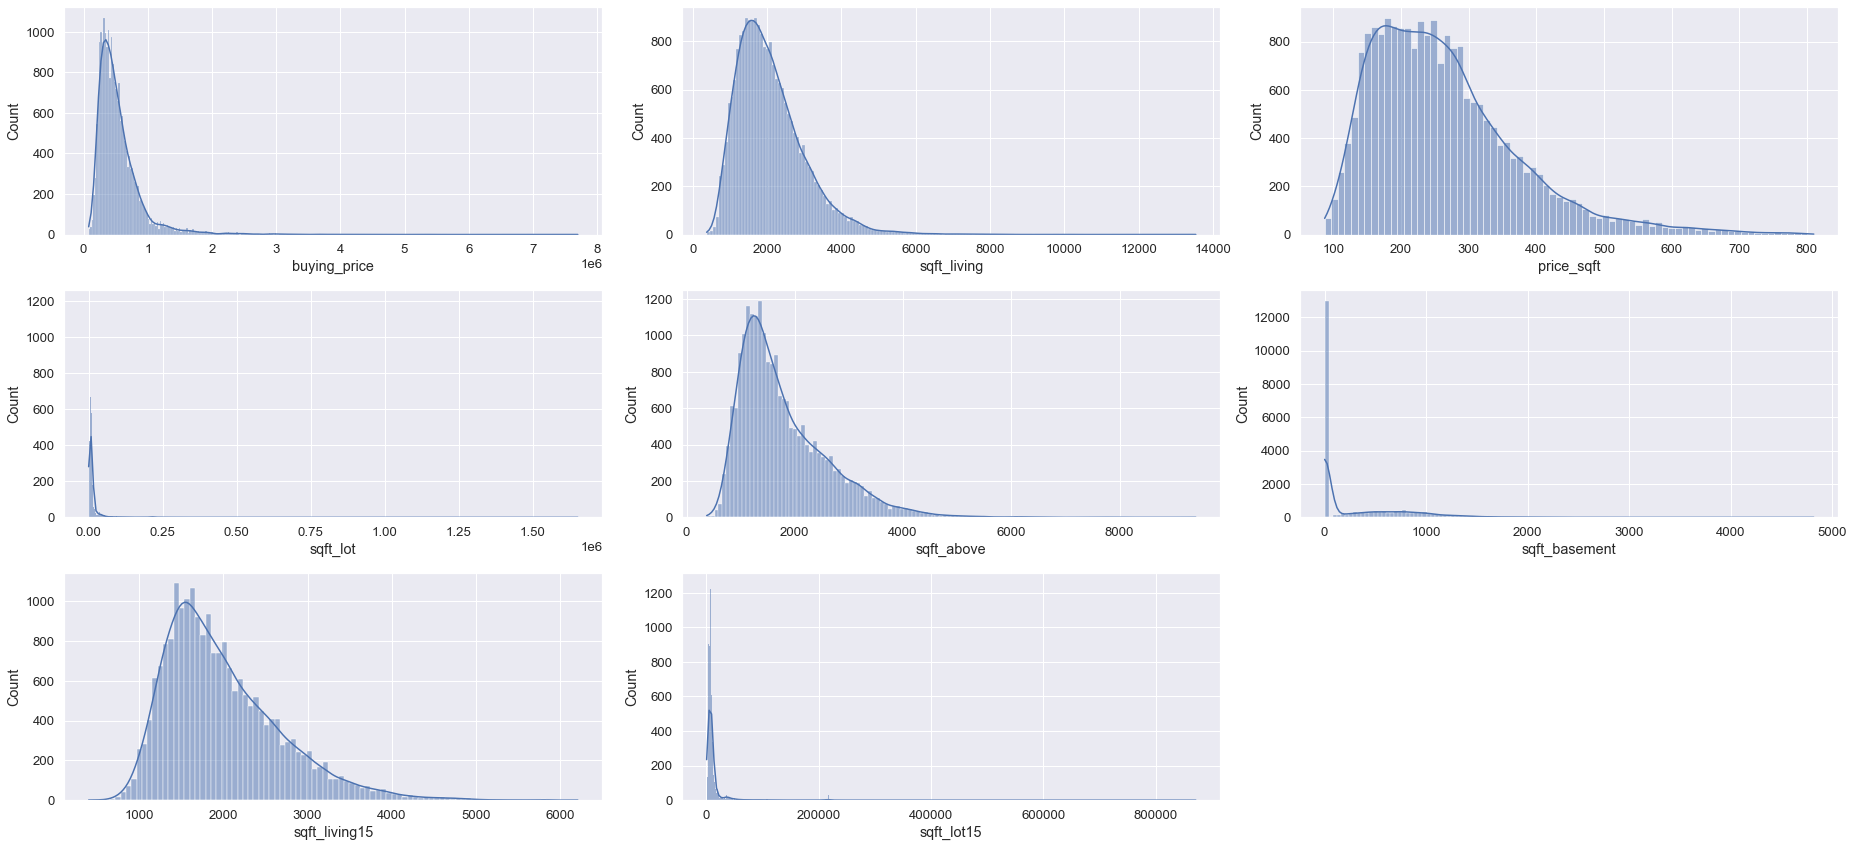

In [29]:
## histplots - 'buying_price', 'age', 'sqft_living', 'price_sqft', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_living15' and 'sqft_lot15'

cols = 3
rows = 3
num_cols = qnt2_attributes[['buying_price', 'sqft_living', 'price_sqft', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_living15', 'sqft_lot15']]
fig = plt.figure(figsize= (26, 12))

for i, col in enumerate(num_cols):
    
    ax=fig.add_subplot( rows, cols, i+1)
    
    sns.histplot(x=qnt2_attributes[col], kde=True, ax=ax)
    
fig.tight_layout()  
plt.show()

When looking at the distribution, we see that all the variables have a bit of rightward asymmetry, i.e., the lower values are more frequent. This asymmetry is a little greater for sqft_lot, sqft_lot15, and price.

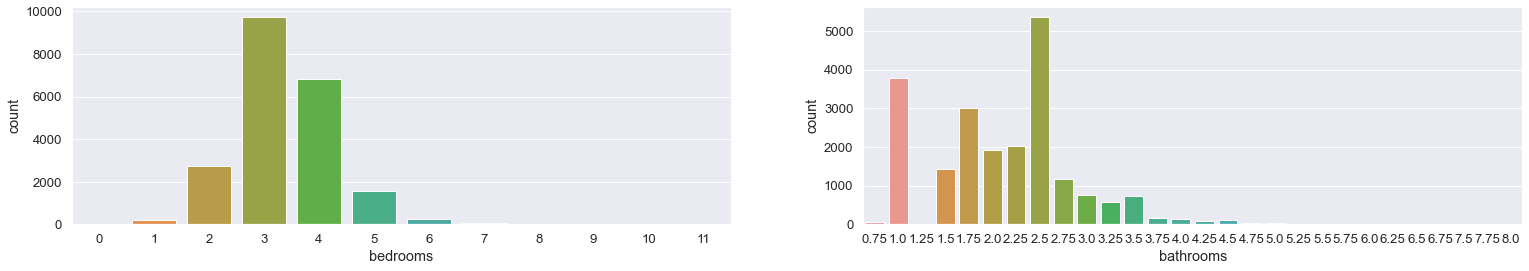

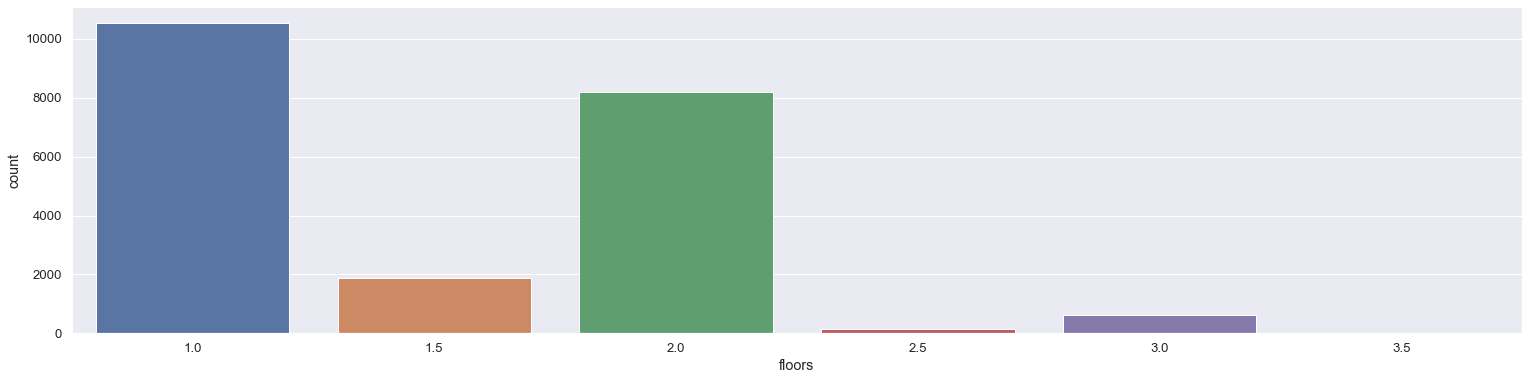

In [30]:
## countplot  - bedrooms, bathrooms and floors
plt.figure(figsize=(26, 4))

plt.subplot(1,2,1)
sns.countplot(x = 'bedrooms', data=df4)

plt.subplot(1,2,2)
sns.countplot(x = 'bathrooms', data=df4);

plt.figure(figsize=(26, 6))
sns.countplot(x = 'floors', data=df4);

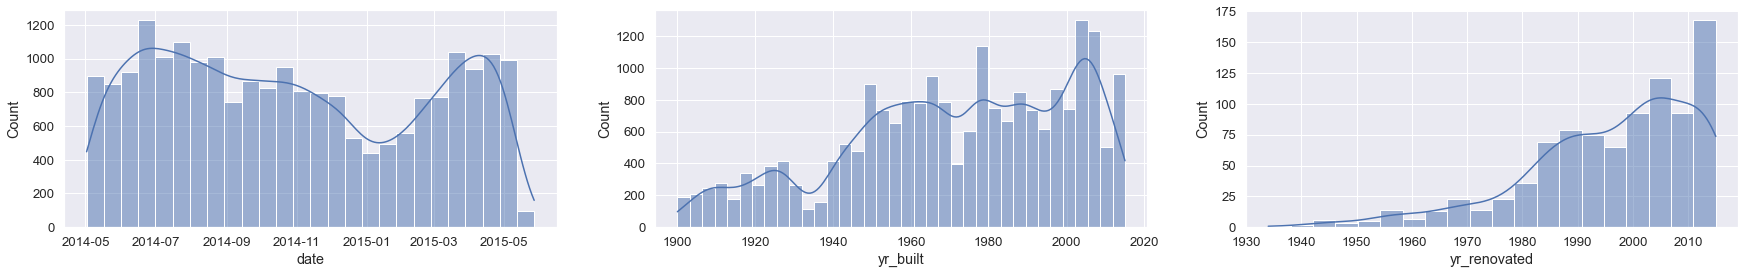

In [31]:
## histplot - date, yr_built, yr_renovated
plt.figure(figsize=(30, 4))

plt.subplot(1, 3, 1)
sns.histplot(x='date', kde=True, data=df4)

plt.subplot(1, 3, 2)
sns.histplot(x='yr_built', kde=True, data=df4)

# having a look, just in the distribution for properties that have being renovated
aux1 = df4[df4['yr_renovated'] > 0][['id', 'yr_renovated']]

plt.subplot(1, 3, 3)
sns.histplot(x = 'yr_renovated', kde=True, data=aux1);

For the data available, most properties are available in spring/summer (March 21 to September 22). We should point out that we don't have enough year-to-year data to state that this is a long-term trend, the dataset goes from 05/02/014 to 05/27/2015.   
Most properties were built after 1960, with a high point just after 2000.   
As for properties that have been renovated, most renovations were done after 1990. This is to be expected, as most properties were built after 1960.

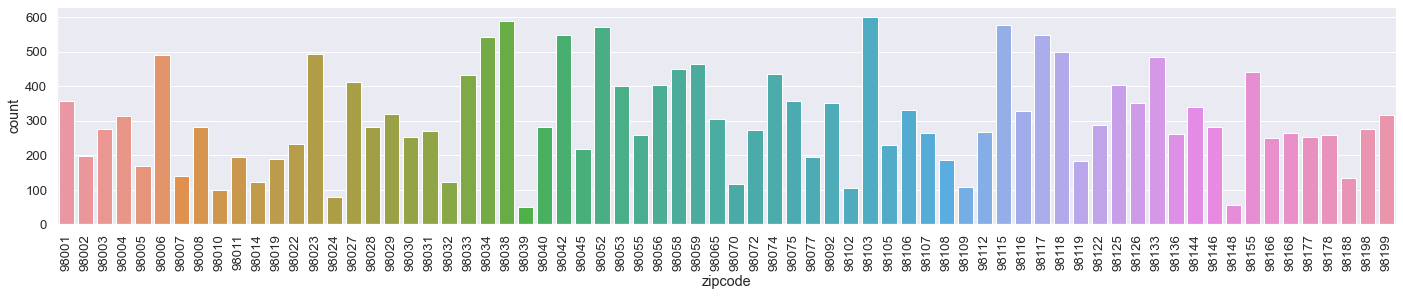

In [32]:
## countplot  - zipcode
plt.figure(figsize=(24, 4))

sns.countplot(x='zipcode', data=df4)

In [33]:
## portfolio density code (github can't load folium maps)
#
#  density_map = folium.Map(location=[df4['lat'].mean(), df4['long'].mean()], defaut_zoom_start=15)
#
#  folium.Map()
#
#  marker_cluster = MarkerCluster().add_to(density_map)
#
#  for name, row in df4.iterrows():
#      folium.Marker([row['lat'], row['long']], 
#                    popup=(f"ZIPCODE {row['zipcode']}")).add_to(marker_cluster)
#
#  density_map

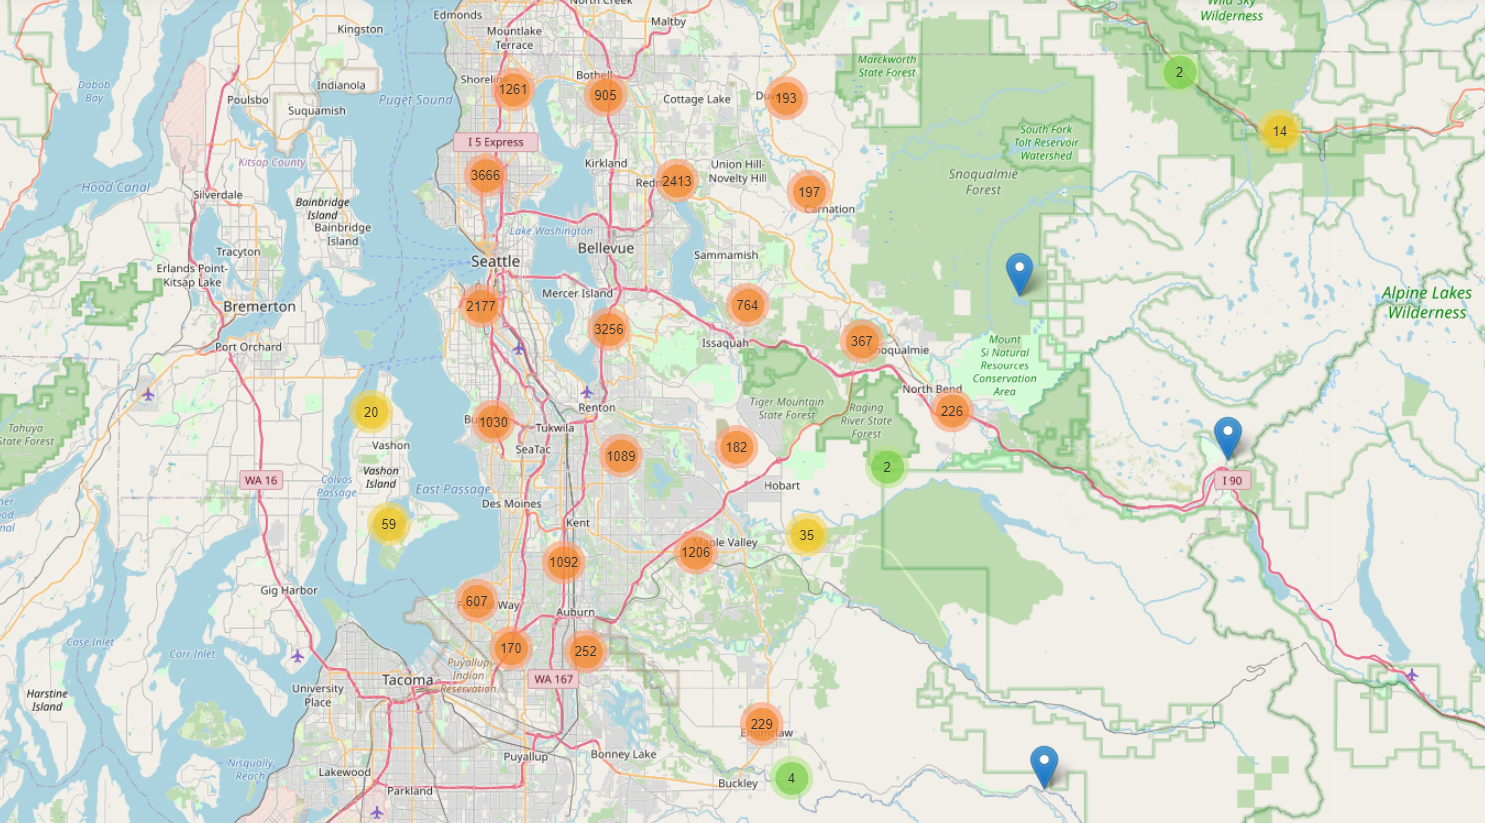

In [34]:
## portfolio density
Image('images/portfolio_density.png')

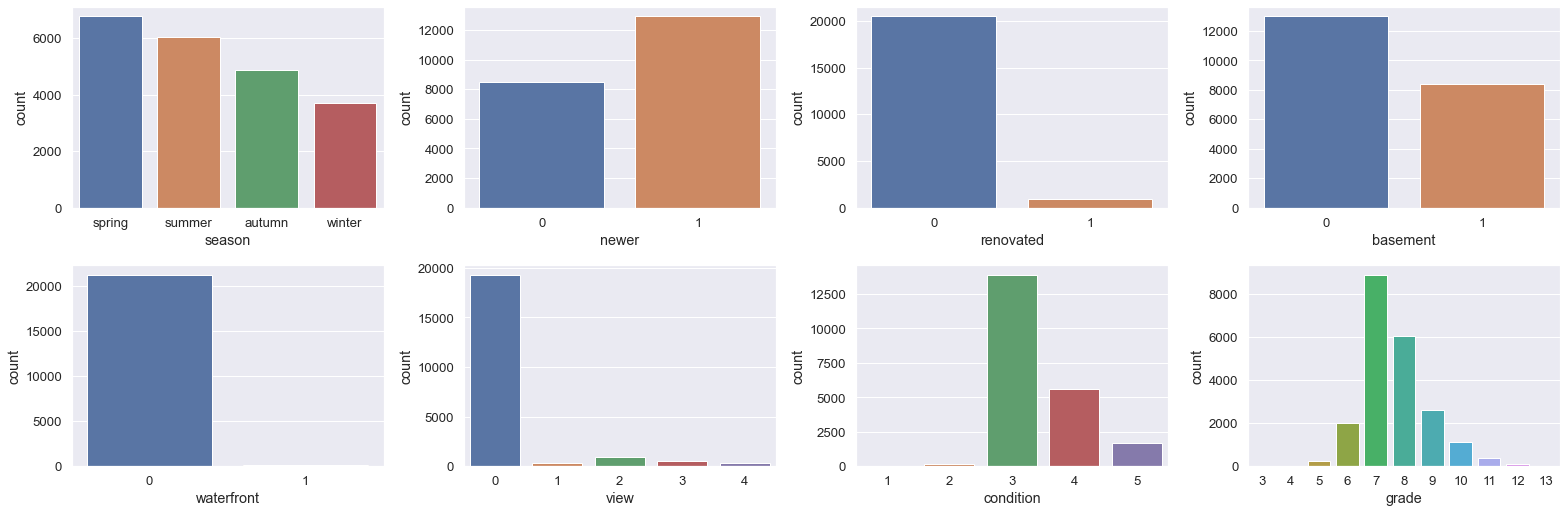

In [35]:
## countplots - season, old, renovated, basement, waterfront, view, condition and grade

cols = 4
rows = 4
num_cols = cat2_attributes[['season',  'newer', 'renovated', 'basement', 'waterfront', 'view', 'condition', 'grade']]
fig = plt.figure(figsize= (22, 14))
for i, col in enumerate(num_cols):
    
    ax=fig.add_subplot( rows, cols, i+1)
    
    sns.countplot(x=cat2_attributes[col], ax=ax)
    
fig.tight_layout()  
plt.show()

* Looking, just the season feature, more properties become available in the spring/summer than in the autumn/winter. We must consider that the dataset ranges from 2014-05-02 to 2015-05-27, and some seasons are included in the dataset twice and others once.
* It was expected that there would be more properties that have never been renovated than properties that have been renovated, since most properties were built after 1960.   
* There are more properties without basement, than with basement.  
* The vast majority of properties do not is waterfront, do not have a good view, and are in good condition or up.      
* Most of the properties have a good level of construction and design.  

## 4.2 Bivariate Analysis

In [40]:
## price by zipcode code (github can't load folium maps)
#
#  def get_geofile(url):
#      geofile = geopandas.read_file(url)
#      return geofile
# 
## get geofile
#  url = 'https://opendata.arcgis.com/datasets/83fc2e72903343aabff6de8cb445b81c_2.geojson'
#  geofile = get_geofile(url)
#
#
#  geofile = geofile[geofile['ZIP'].isin(df4['zipcode'].tolist())]
# 
#  region_price_map = folium.Map(location = [df4['lat'].mean(), df4['long'].mean()], defaut_zoom_start=15)
# 
#  folium.Choropleth(data = df4,
#                              geo_data = geofile, 
#                              columns = ['zipcode', 'buying_price'], 
#                              key_on = 'feature.properties.ZIP', 
#                              fill_color='YlOrRd', 
#                              fill_opacity = 0.7, 
#                              line_opacity = 0.2, 
#                              legend_name = 'Average Price (USD)' ).add_to(region_price_map)
# 
#  region_price_map

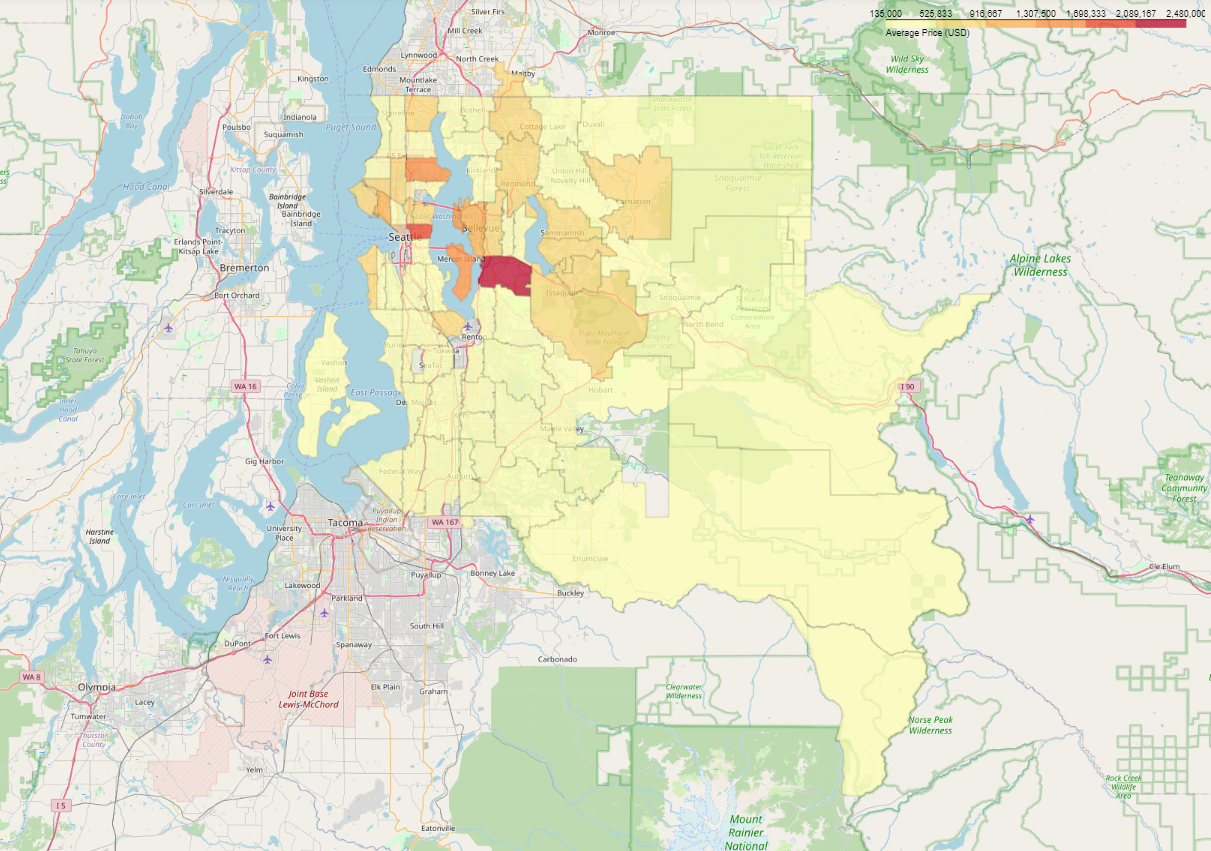

In [41]:
## price by zipcode
Image('images/price_density.png')

The regions near the major centers have the most properties priced above the median and larger. Properties near Lake Washington are generally priced well above the median.

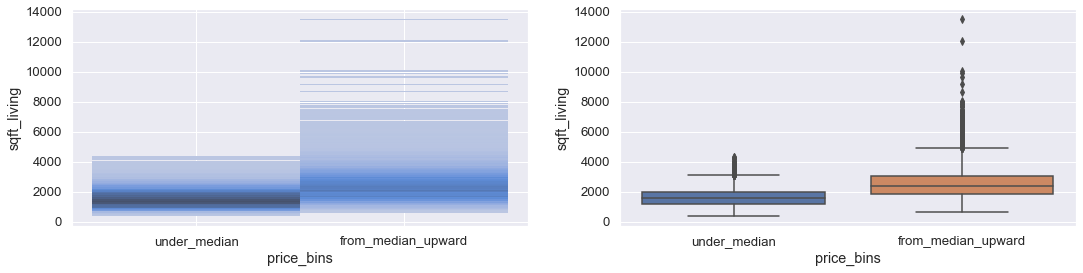

In [42]:
## price_bins x sqft_living
plt.figure(figsize=(18, 4))

plt.subplot(1,2,1)
sns.histplot(x='price_bins', y='sqft_living', data=df4)

plt.subplot(1,2,2)
sns.boxplot(x='price_bins', y='sqft_living', data=df4);

Properties under the median have a maximum built size just above 4000 sqft, with concentration around 1000 and 2000 sqft. For properties priced from the median upward, there is a much wider price range, with a concentration around 2000 and 3000 sqft.

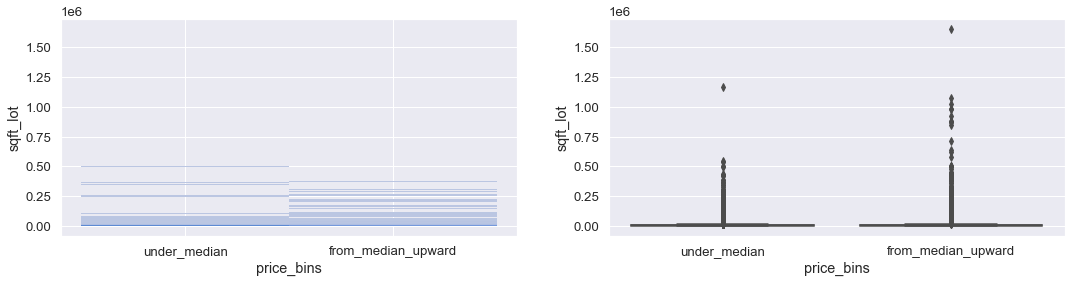

In [43]:
## price_bins x sqft_lot
plt.figure(figsize=(18, 4))

plt.subplot(1,2,1)
sns.histplot(x='price_bins', y='sqft_lot', data=df4)

plt.subplot(1,2,2)
sns.boxplot(x='price_bins', y='sqft_lot', data=df4);

There does not seem to be a strong correlation between property price and sqft_lot.

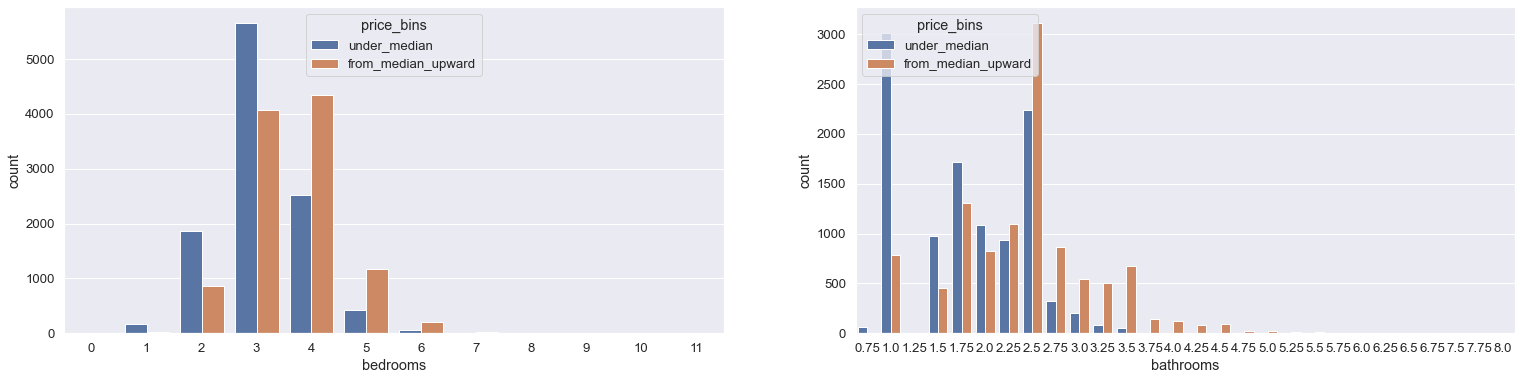

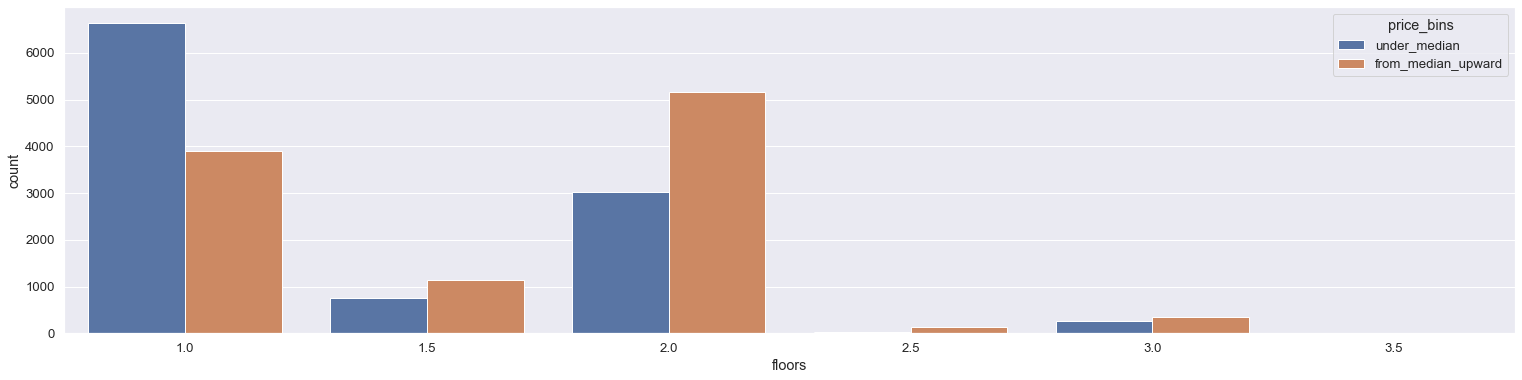

In [44]:
## bedrooms, bathrooms and floors X price_bins
plt.figure(figsize=(26, 6))

plt.subplot(1,2,1)
sns.countplot(x= 'bedrooms', hue='price_bins', data=df4)

plt.subplot(1,2,2)
sns.countplot(x= 'bathrooms', hue='price_bins', data=df4);

plt.figure(figsize=(26, 6))
sns.countplot(x= 'floors', hue='price_bins', data=df4);

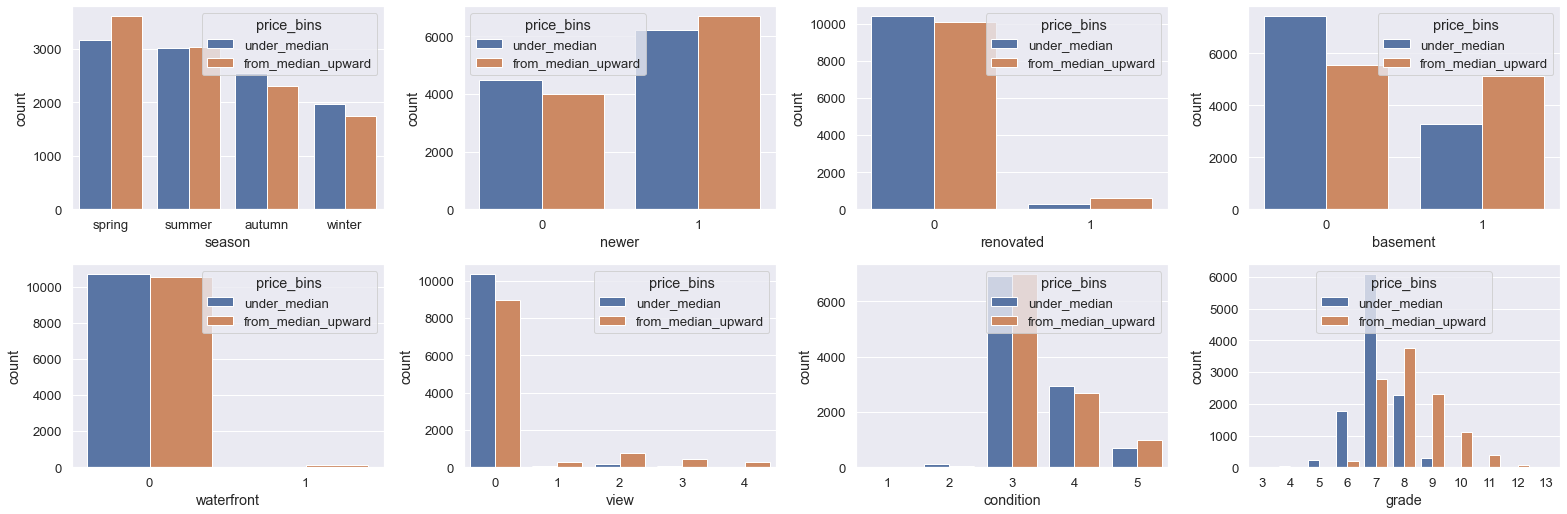

In [45]:
## season, old, renovated, basement, waterfront, view, condition and grade x price_bins

cols = 4
rows = 4
num_cols = df4[['season',  'newer', 'renovated', 'basement', 'waterfront', 'view', 'condition', 'grade']]
fig = plt.figure(figsize= (22, 14))
for i, col in enumerate(num_cols):
    
    ax=fig.add_subplot( rows, cols, i+1)
    
    sns.countplot(x=cat2_attributes[col], hue=df4['price_bins'], ax=ax)
    
fig.tight_layout()  
plt.show()

## 4.3 Multivatiate Analysis

# 5.0 Conclusion and Visualization